In [146]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
%matplotlib inline

import cufflinks as cf
import plotly.offline
from plotly.offline import *
cf.go_offline

<function cufflinks.offline.go_offline(connected=None)>

In [147]:
start = datetime.datetime(2006, 1, 1)
end = datetime.datetime(2016, 1, 1)

In [148]:
BAC = data.DataReader("BAC", 'yahoo', start, end) #bank of america
C = data.DataReader('C', 'yahoo', start, end) #citigroup
JPM = data.DataReader('JPM', 'yahoo', start, end) #jpmorgan chase
GS = data.DataReader('GS', 'yahoo', start, end) #goldman sachs
MS = data.DataReader('MS', 'yahoo', start, end) #morgan stanley
WFC = data.DataReader('WFC', 'yahoo', start, end) #wells fargo

In [149]:
tickers = sorted(['BAC', 'C', 'JPM', 'GS', 'MS', 'WFC'])

In [150]:
bank_stocks = pd.concat([BAC, C, GS, JPM, MS, WFC], keys = tickers, axis = 1)

In [151]:
bank_stocks

BAC                                                          \
                 High        Low       Open      Close      Volume  Adj Close   
Date                                                                            
2006-01-03  47.180000  46.150002  46.919998  47.080002  16296700.0  34.425114   
2006-01-04  47.240002  46.450001  47.000000  46.580002  17757900.0  34.059509   
2006-01-05  46.830002  46.320000  46.580002  46.639999  14970700.0  34.103382   
2006-01-06  46.910000  46.349998  46.799999  46.570000  12599800.0  34.052204   
2006-01-09  46.970001  46.360001  46.720001  46.599998  15619400.0  34.074108   
...               ...        ...        ...        ...         ...        ...   
2015-12-24  17.379999  17.219999  17.320000  17.270000  29369400.0  15.574412   
2015-12-28  17.230000  16.980000  17.219999  17.129999  41777500.0  15.448163   
2015-12-29  17.350000  17.160000  17.250000  17.280001  45670400.0  15.583436   
2015-12-30  17.240000  17.040001  17.200001  17.049999  35066400.0  15.376013   
2015-12-31  17.070000  16.830000  17.010000  16.830000  47153000.0  15.177611   

                     C                                      ...         MS  \
                  High         Low        Open       Close  ...       Open   
Date                                                        ...              
2006-01-03  493.799988  481.100006  490.000000  492.899994  ...  57.169998   
2006-01-04  491.000000  483.500000  488.600006  483.799988  ...  58.700001   
2006-01-05  487.799988  484.000000  484.399994  486.200012  ...  58.549999   
2006-01-06  489.000000  482.000000  488.799988  486.200012  ...  58.770000   
2006-01-09  487.399994  483.000000  486.000000  483.899994  ...  58.630001   
...                ...         ...         ...         ...  ...        ...   
2015-12-24   52.970001   52.450001   52.480000   52.709999  ...  32.570000   
2015-12-28   52.570000   51.959999   52.570000   52.380001  ...  32.360001   
2015-12-29   53.220001   52.740002   52.759998   52.980000  ...  32.439999   
2015-12-30   52.939999   52.250000   52.840000   52.299999  ...  32.500000   
2015-12-31   52.389999   51.750000   52.070000   51.750000  ...  31.910000   

                                                   WFC                        \
                Close     Volume  Adj Close       High        Low       Open   
Date                                                                           
2006-01-03  58.310001  5377000.0  36.631054  31.975000  31.195000  31.600000   
2006-01-04  58.349998  7977800.0  36.656166  31.820000  31.365000  31.799999   
2006-01-05  58.509998  5778000.0  36.756695  31.555000  31.309999  31.500000   
2006-01-06  58.570000  6889800.0  36.794384  31.775000  31.385000  31.580000   
2006-01-09  59.189999  4144500.0  37.183868  31.825001  31.555000  31.674999   
...               ...        ...        ...        ...        ...        ...   
2015-12-24  32.480000  2798200.0  28.434517  55.090000  54.709999  54.970001   
2015-12-28  32.169998  5420300.0  28.163136  54.779999  54.169998  54.549999   
2015-12-29  32.549999  6388200.0  28.495804  55.349998  54.990002  55.110001   
2015-12-30  32.230000  5057200.0  28.215654  55.310001  54.790001  55.270000   
2015-12-31  31.809999  8154300.0  27.847975  54.950001  54.220001  54.509998   

                                              
                Close      Volume  Adj Close  
Date                                          
2006-01-03  31.900000  11016400.0  20.613142  
2006-01-04  31.530001  10870000.0  20.374050  
2006-01-05  31.495001  10158000.0  20.351437  
2006-01-06  31.680000   8403800.0  20.470978  
2006-01-09  31.674999   5619600.0  20.467749  
...               ...         ...        ...  
2015-12-24  54.820000   4999400.0  46.133739  
2015-12-28  54.680000   8288800.0  46.015930  
2015-12-29  55.290001   7894900.0  46.529282  
2015-12-30  54.889999   8016900.0  46.192661  
2015-12-31  54.360001  10929800.0  45.746639  

[2517 rows

In [152]:
bank_stocks.columns.names = ['Bank Ticker', 'Stock Info']

In [153]:
bank_stocks.xs('Close', axis = 1, level = 'Stock Info').max()

Bank Ticker
BAC     54.900002
C      564.099976
GS     247.919998
JPM     70.080002
MS      89.300003
WFC     58.520000
dtype: float64

In [154]:
returns = pd.DataFrame()

In [155]:
for tick in tickers:
    returns[tick + ' Return'] = bank_stocks[tick]['Close'].pct_change()

In [156]:
returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158


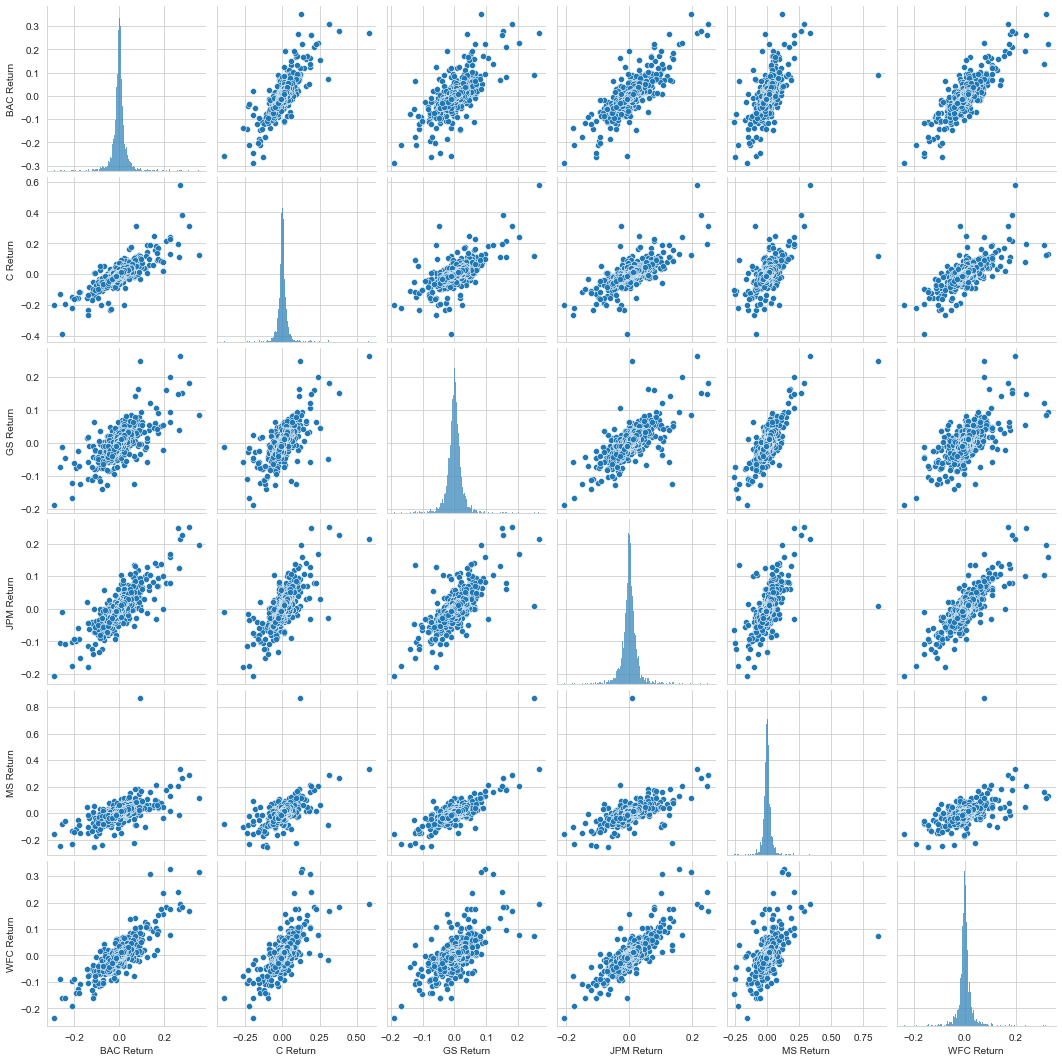

In [157]:
sns.pairplot(returns, diag_kind='hist')

In [158]:
returns.idxmin()

BAC Return   2009-01-20
C Return     2009-02-27
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2009-01-20
dtype: datetime64[ns]

In [159]:
returns.idxmax()

BAC Return   2009-04-09
C Return     2008-11-24
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns]

In [160]:
returns.std()

BAC Return    0.036647
C Return      0.038672
GS Return     0.025390
JPM Return    0.027667
MS Return     0.037819
WFC Return    0.030238
dtype: float64

C:\Users\ak111\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='MS Return', ylabel='Density'>

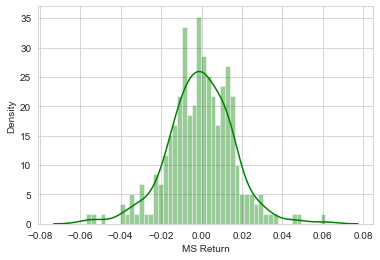

In [161]:
sns.distplot(returns.loc['2015']['MS Return'], color = 'green',
            bins = 50)

C:\Users\ak111\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='C Return', ylabel='Density'>

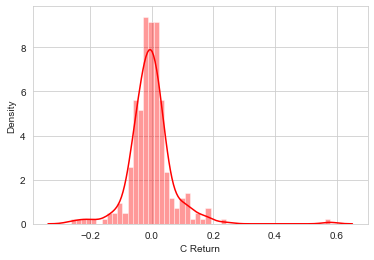

In [162]:
sns.distplot(returns.loc['2008']['C Return'], color = 'red',
            bins = 50)

<AxesSubplot:xlabel='Date'>

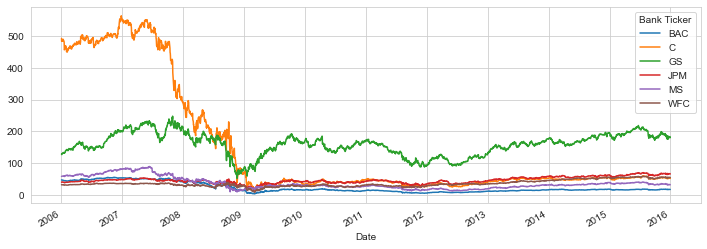

In [163]:
sns.set_style('whitegrid')
bank_stocks.xs('Close', axis = 1, level = 1).plot(label = tickers, figsize = (12, 4))


In [164]:
cf.go_offline()
bank_stocks.xs('Close', axis = 1, level = 1).iplot()

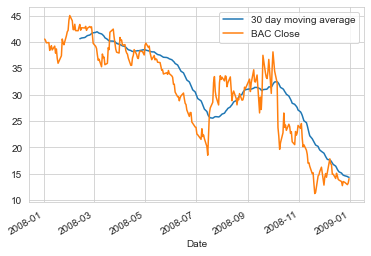

In [169]:
BAC['Close'].loc['2008'].rolling(window=30).mean().plot(label = '30 day moving average')
BAC['Close'].loc['2008'].plot(label = 'BAC Close')
plt.legend()

<AxesSubplot:xlabel='Bank Ticker', ylabel='Bank Ticker'>

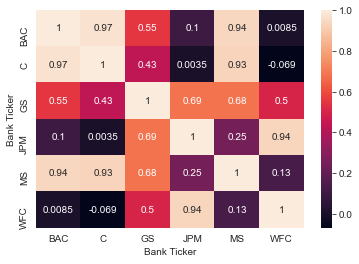

In [174]:
sns.heatmap(bank_stocks.xs('Close', axis = 1, level = 1).corr(), annot = True)

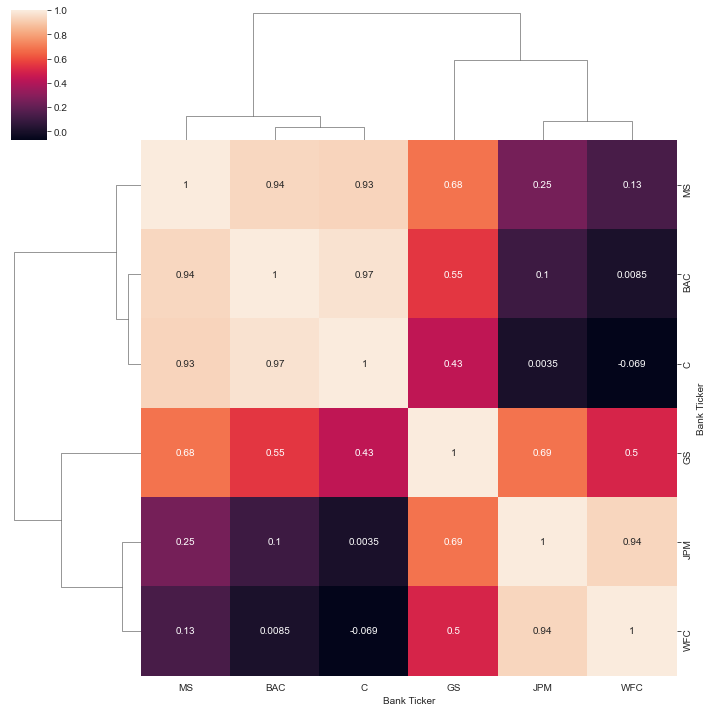

In [175]:
sns.clustermap(bank_stocks.xs('Close', axis = 1, level = 1).corr(), annot = True)

In [176]:
close_corr = bank_stocks.xs('Close', axis = 1, level = 1).corr()

In [179]:
close_corr.iplot(kind = 'heatmap', colorscale = 'rdylbu')

In [185]:
bac15 = BAC[['Open', 'High', 'Low', 'Close']].loc['2015']
bac15.iplot(kind = 'candle')

In [186]:
MS['Close'].loc['2015'].ta_plot(study = 'sma', periods = [13, 21, 55])

In [188]:
BAC['Close'].loc['2015'].ta_plot(study = 'boll')